# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)



604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# Weather from above cited cities
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
APPID = weather_api_key
query_url = f"{base_url}appid={APPID}&units={units}&q="

#cities = ["Minneapolis", "Duluth", "Mankato"]

# Lists for output
lat = []
lon = []
found_cities = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(city)
        print(f"Processing record: {city}")
    except:
        print(f"City not found: {city}")
print(f"Finished")


Processing record: busselton
Processing record: roald
Processing record: coos bay
Processing record: cherskiy
Processing record: atuona
Processing record: georgetown
Processing record: esperance
Processing record: nemuro
Processing record: nehe
Processing record: ushuaia
Processing record: hermanus
Processing record: ponta do sol
Processing record: butaritari
Processing record: cidreira
Processing record: port keats
Processing record: badou
Processing record: soyo
Processing record: rikitea
City not found: illoqqortoormiut
Processing record: mataura
Processing record: mahebourg
Processing record: yulara
Processing record: vasyurinskaya
Processing record: muros
Processing record: taltal
Processing record: pisco
Processing record: marsh harbour
Processing record: kavieng
Processing record: hilo
Processing record: west fargo
Processing record: avarua
Processing record: richards bay
Processing record: kapit
Processing record: victoria
Processing record: farafangana
Processing record: barro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:

weather_df = pd.DataFrame({
    'City':found_cities, 
    'Lat':lat,
    'Lon':lon,
    'Max Temp':temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date': dt.date.today()
    })
weather_df.to_csv("../python-api-challenge/output/cities.csv", index=True, index_label='City', header=True)

weather_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,51.80,82,53,4.92,AU,2022-08-10
1,roald,62.5833,6.1333,66.00,94,75,27.63,NO,2022-08-10
2,coos bay,43.3665,-124.2179,79.32,56,0,9.22,US,2022-08-10
3,cherskiy,68.7500,161.3000,60.30,65,0,2.86,RU,2022-08-10
4,atuona,-9.8000,-139.0333,77.32,76,13,22.08,PF,2022-08-10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
steamy = weather_df[weather_df['Humidity'] > 100]
steamy

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [44]:
weather_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,19.742490,17.230004,69.389677,71.157706,54.181004,7.940072
std,33.653127,92.483546,14.097333,21.009706,39.340997,5.833336
min,-54.800000,-179.166700,33.300000,9.000000,0.000000,0.000000
25%,-8.576875,-65.767025,58.062500,59.000000,13.250000,3.770000
50%,22.426100,18.828850,70.965000,77.000000,60.000000,6.410000
75%,47.955275,99.066850,80.102500,88.000000,97.000000,10.735000
max,78.218600,179.316700,104.140000,100.000000,100.000000,40.780000


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There were no cities over 100%

In [47]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.loc[weather_df['Humidity'] <= 100]
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,busselton,-33.6500,115.3333,51.80,82,53,4.92,AU
1,roald,62.5833,6.1333,66.00,94,75,27.63,NO
2,coos bay,43.3665,-124.2179,79.32,56,0,9.22,US
3,cherskiy,68.7500,161.3000,60.30,65,0,2.86,RU
4,atuona,-9.8000,-139.0333,77.32,76,13,22.08,PF


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

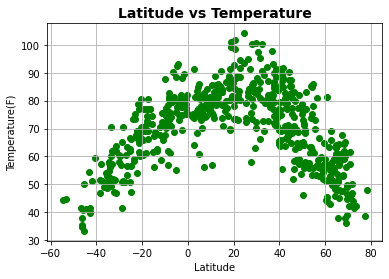

In [52]:
plt.scatter(lat, temp, marker="o", facecolors="green" )

# add labels and display as a grid
plt.title("Latitude vs Temperature", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Temperature(F)", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_temp.png")
plt.show()

### The closer you are to the equator (0), the greater the likelihood of a higher temperature.

## Latitude vs. Humidity Plot

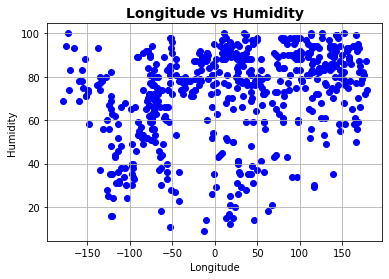

In [55]:
plt.scatter(lon, humidity, marker="o", facecolors="blue" )

# add labels and display as a grid
plt.title("Longitude vs Humidity", fontsize=14, weight='bold')
plt.xlabel("Longitude", fontsize=10)
plt.ylabel("Humidity", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lon_vs_humid.png")
plt.show()

### The humidity levels are often more concentrated away from 0

## Latitude vs. Cloudiness Plot

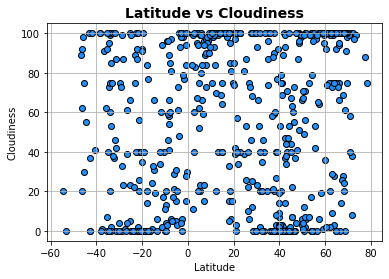

In [91]:
plt.scatter(lat, cloudiness, marker="o", facecolors="dodgerblue", edgecolor='black' )

# add labels and display as a grid
plt.title("Latitude vs Cloudiness", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_cloud.png")
plt.show()

### The sun is always shining near the equator.

## Latitude vs. Wind Speed Plot

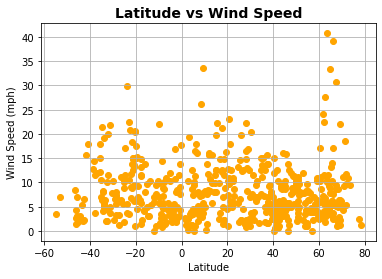

In [59]:
plt.scatter(lat, wind_speed, marker="o", facecolors="orange" )

# add labels and display as a grid
plt.title("Latitude vs Wind Speed", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_wind.png")
plt.show()

### Wind speed is concentrated between 0 mph and 10 mph. There are some fliers farther away from the equator.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45161364762252004


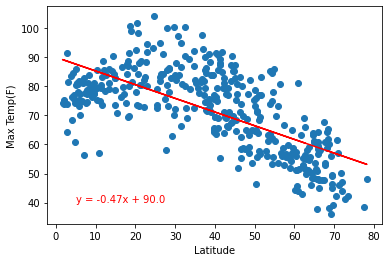

In [73]:
northern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >0 ]

# Call variables for comparison
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.0,40), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6967869960669987


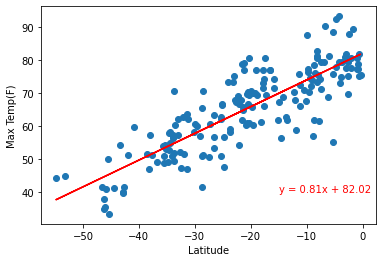

In [74]:
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] <0 ]

# Call variables for comparison
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-15.0,40), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000336369503374408


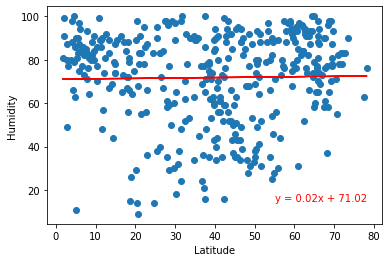

In [78]:
# Call variables for comparison
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(55.0,15), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0033135936317691345


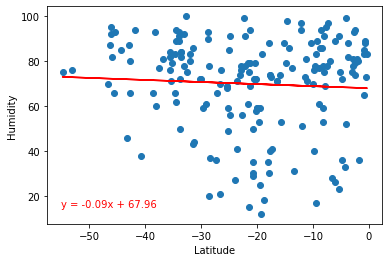

In [81]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55.0,15), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002475873286448224


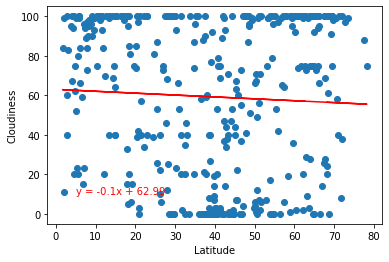

In [84]:
# Call variables for comparison
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.0,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0004910274291184392


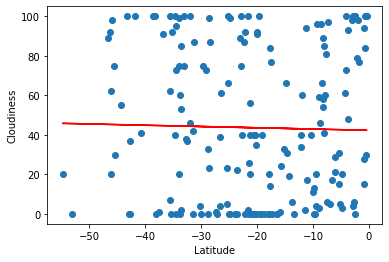

In [85]:
# Call variables for comparison
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.0,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00046656119335722085


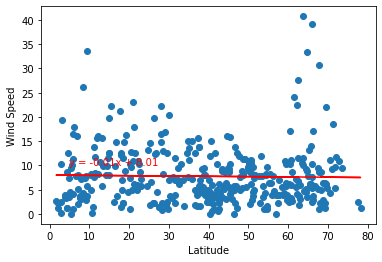

In [86]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.0,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004768797664009646


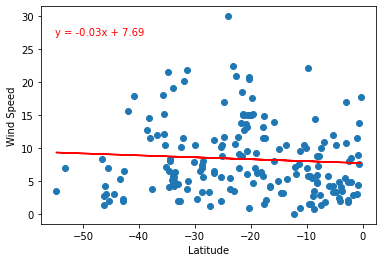

In [90]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55.0,27), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()